In [11]:
pip install pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyplot (from versions: none)
ERROR: No matching distribution found for pyplot


In [262]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [306]:
data = pd.read_csv('Price.csv')

In [307]:
from datetime import *

data['DATE'] = data['DATE'].astype('datetime64[ns]')



In [308]:
data

,DATE,Open,High,Low,Close,Volume,MarketCap
0,2015-04-01,244.22,247.54,241.16,247.27,22877200,3.463619e+09
1,2015-04-02,247.09,254.46,245.42,253.01,26272600,3.544973e+09
2,2015-04-03,253.07,256.04,251.88,254.32,23146600,3.564355e+09
3,2015-04-04,254.29,255.26,251.10,253.70,12493500,3.556559e+09
4,2015-04-05,253.76,260.67,251.94,260.60,19649200,3.654268e+09
...,...,...,...,...,...,...,...
1731,2019-12-27,7238.14,7363.53,7189.93,7290.09,22777360996,1.320000e+11
1732,2019-12-28,7289.03,7399.04,7286.91,7317.99,21365673026,1.330000e+11
1733,2019-12-29,7317.65,7513.95,7279.87,7422.65,22445257702,1.350000e+11
1734,2019-12-30,7420.27,7454.82,7276.31,7293.00,22874131672,1.320000e+11


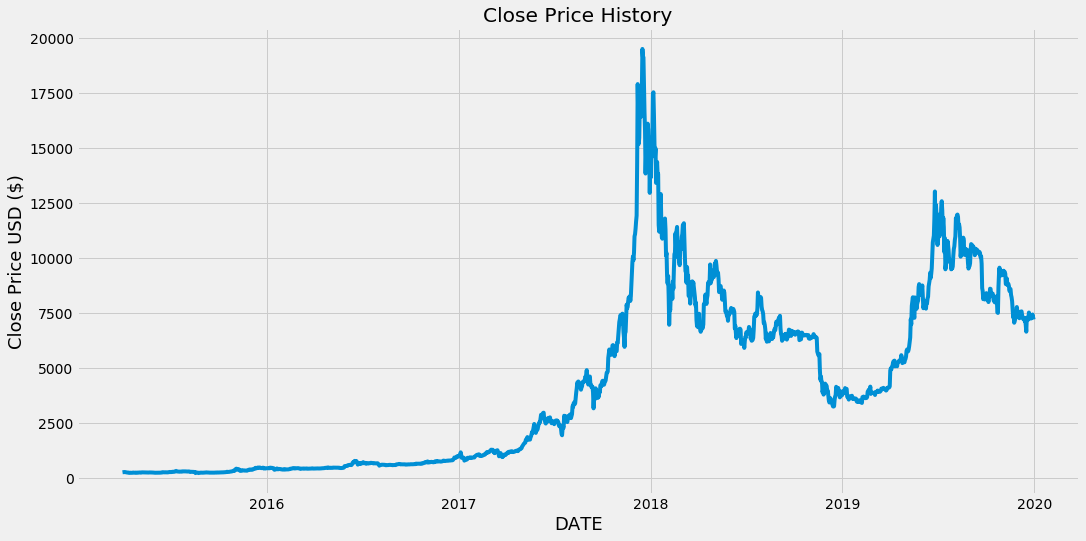

In [309]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['DATE'],data['Close'])
plt.xlabel('DATE', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [310]:
#create new dataframe with only the 'close' column
Closedata = data.filter(['Close'])

#convert the dataframe to a numpy array
dataset = Closedata.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.85)

training_data_len

1476

In [311]:
train_data

array([[0.36206474],
       [0.36721849],
       [0.37394067],
       ...,
       [0.01305704],
       [0.01312445],
       [0.01273351]])

In [312]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00190699],
       [0.0022046 ],
       [0.00227253],
       ...,
       [0.37394067],
       [0.36721849],
       [0.36206474]])

In [313]:
#create the training dataset
#create the scaled training dataset
train_data=scaled_data[:training_data_len, :]
#split the data into x_train and y_train datasets
x_train=[]
y_train=[]

for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i, 0])
    y_train.append(train_data[i,0])
    if i<=51:
        print(x_train)
        print(y_train)
        print()

[array([0.00190699, 0.0022046 , 0.00227253, 0.00224038, 0.00259814,
       0.00233319, 0.00221342, 0.00179033, 0.00172086, 0.00132629,
       0.00135118, 0.00133044, 0.00073107, 0.00044953, 0.00069166,
       0.00093742, 0.0006424 , 0.00066729, 0.00062789, 0.00073314,
       0.00128481, 0.00122829, 0.00134651, 0.00107741, 0.00082439,
       0.00046353, 0.00097475, 0.0007964 , 0.00079432, 0.00133044,
       0.00111941, 0.00126718, 0.00154872, 0.00147924, 0.00132888,
       0.00100016, 0.00139162, 0.00173019, 0.00162494, 0.00154561,
       0.00164205, 0.00158761, 0.00134236, 0.00137088, 0.00140562,
       0.00133044, 0.00136414, 0.00117385, 0.00111267, 0.00122   ])]
[0.0012884386353231286]

[array([0.00190699, 0.0022046 , 0.00227253, 0.00224038, 0.00259814,
       0.00233319, 0.00221342, 0.00179033, 0.00172086, 0.00132629,
       0.00135118, 0.00133044, 0.00073107, 0.00044953, 0.00069166,
       0.00093742, 0.0006424 , 0.00066729, 0.00062789, 0.00073314,
       0.00128481, 0.00122829, 0.

In [314]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [315]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1426, 50, 1)

In [316]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(1,activation='linear')) #다음날 하루의 데이터 예측
model.compile(loss='mse', optimizer='rmsprop') #min squared error for loss
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [317]:
#compile the mode
model.compile(optimizer='adam', loss='mean_squared_error')

In [318]:
#Train the model
model.fit(x_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
1426/1426 [==============================] - 6s 4ms/step - loss: 0.0036
Epoch 2/20
1426/1426 [==============================] - 5s 4ms/step - loss: 0.0013
Epoch 3/20
1426/1426 [==============================] - 5s 4ms/step - loss: 8.9055e-04
Epoch 4/20
1426/1426 [==============================] - 5s 4ms/step - loss: 7.5236e-04
Epoch 5/20
1426/1426 [==============================] - 5s 4ms/step - loss: 7.4909e-04
Epoch 6/20
1426/1426 [==============================] - 5s 4ms/step - loss: 7.3821e-04
Epoch 7/20
1426/1426 [==============================] - 5s 4ms/step - loss: 7.1997e-04
Epoch 8/20
1426/1426 [==============================] - 5s 4ms/step - loss: 5.2753e-04
Epoch 9/20
1426/1426 [==============================] - 5s 4ms/step - loss: 5.2195e-04
Epoch 10/20
1426/1426 [==============================] - 6s 4ms/step - loss: 5.2563e-04
Epoch 11/20
1426/1426 [==============================] - 5s 4ms/step - loss: 5.1126e-04
Epoch 12/20
1426/1426 [==========================

In [319]:
#create the testing dataset
#create a new array containg scaled values from index 1426 to 1736
test_data = scaled_data[training_data_len - 50: ,:]
#create the datasets x_test and y_test
x_test = []
y_test=dataset[training_data_len:, :]
for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i,0])
    

In [320]:
#convert the data to a numpy array to use in LSTM model
x_test=np.array(x_test)

In [321]:
#Reshape data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [322]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [323]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse

54.36141248497599

In [351]:
Closedata['Close']

0        247.27
1        253.01
2        254.32
3        253.70
4        260.60
         ...   
1731    7290.09
1732    7317.99
1733    7422.65
1734    7293.00
1735    7193.60
Name: Close, Length: 1736, dtype: float64

In [352]:
train['Close']

0        247.27
1        253.01
2        254.32
3        253.70
4        260.60
         ...   
1471    5064.49
1472    5089.54
1473    5096.59
1474    5167.72
1475    5067.11
Name: Close, Length: 1476, dtype: float64

C:\Users\jinny\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


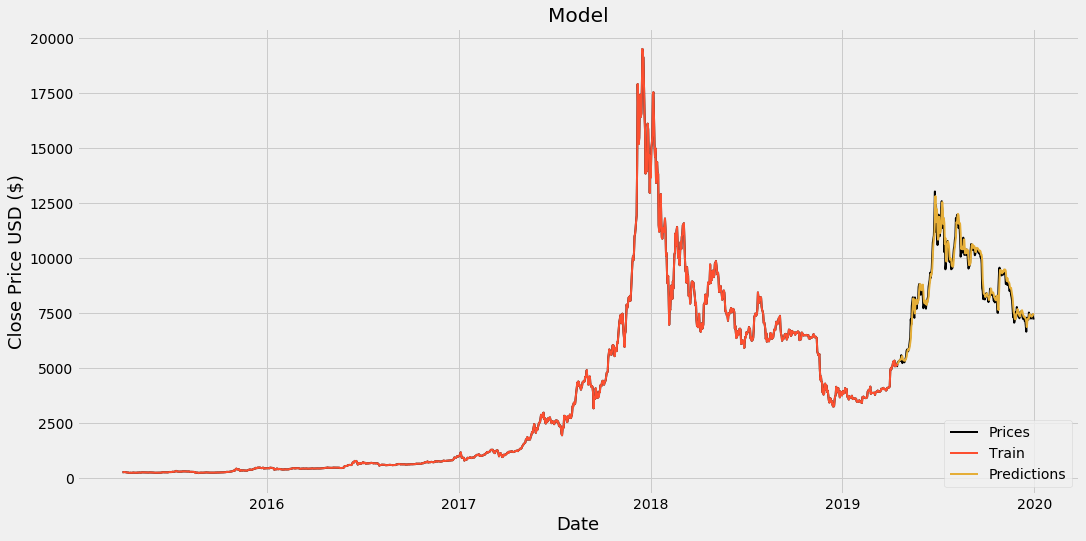

In [360]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualize data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

a=plt.plot(data['DATE'],data['Close'])
b=plt.plot(train['DATE'], train['Close'])
c=plt.plot(valid['DATE'],valid['Predictions'])

plt.setp(a, color='black', linewidth=2.0)
plt.setp(b, linewidth=2.0)
plt.setp(c, linewidth=2.0)

plt.legend(['Prices', 'Train', 'Predictions'], loc='lower right')
plt.show()